In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/audreywee/Documents/Uni/coding/data files/2018_annual.csv')
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215"
1,1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001"
2,2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035"
3,3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301"
4,4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016"


In [3]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215"
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001"
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035"
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301"
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  int64  
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 8.5+ MB


In [7]:
data['Order Date'] = data['Order Date'].apply(pd.to_datetime)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB


In [8]:
data['Month'] = data['Order Date'].dt.month
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 9.9+ MB


Month that makes the best sale

In [9]:
data['Sales'] = data['Price Each'] * data['Quantity Ordered']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001",9,23.90
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035",9,11.95
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301",9,149.99
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016",9,11.95


Figure 2.1

Month
1     1816846.41
9     2091892.33
2     2195978.76
8     2239309.25
6     2570410.65
7     2641281.10
3     2800592.49
5     3144348.98
11    3190667.83
4     3378020.92
10    3727769.15
12    4603683.90
Name: Sales, dtype: float64


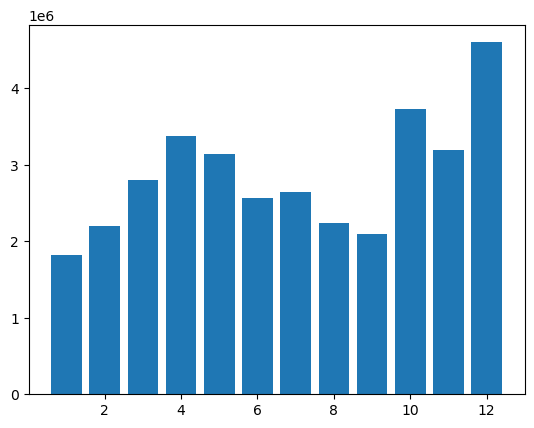

In [11]:
groupby_data = data.groupby('Month')
gross_sales_by_month = groupby_data.sum().sort_values("Sales")["Sales"]
print(gross_sales_by_month)

fig, ax = plt.subplots()
ax.bar(gross_sales_by_month.index, gross_sales_by_month)
plt.show()

In [12]:
gross_sales_by_month

Month
1     1816846.41
9     2091892.33
2     2195978.76
8     2239309.25
6     2570410.65
7     2641281.10
3     2800592.49
5     3144348.98
11    3190667.83
4     3378020.92
10    3727769.15
12    4603683.90
Name: Sales, dtype: float64

City that makes the best sales

In [15]:
def city_from_address(address):
    substrs = address.split(",")
    city =substrs[1].strip()
  
    return city

data['City'] = data['Purchase Address'].apply(city_from_address)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215",9,15.36,Boston
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001",9,23.90,New York City
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035",9,11.95,Portland
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301",9,149.99,Atlanta
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016",9,11.95,San Francisco


Figure 2.2

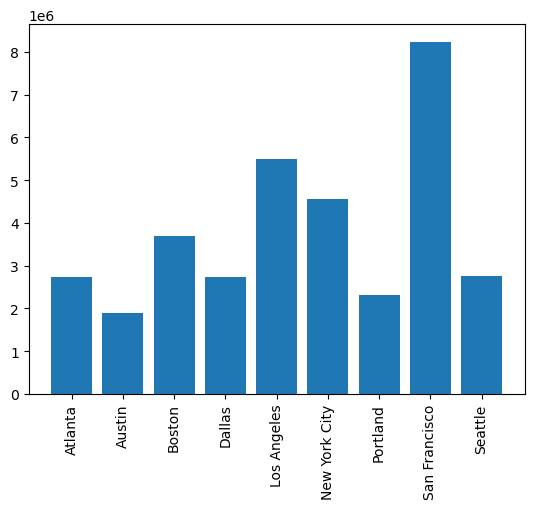

In [19]:
groupby_data = data.groupby("City")
gross_sales_by_city = groupby_data.sum()['Sales']

fig, ax = plt.subplots()
ax.bar(gross_sales_by_city.index, gross_sales_by_city)

plt.xticks(rotation=90)
plt.show()

City that makes the best sales across 12 months

In [20]:
groupby_data = data.groupby(['Month', 'City']).sum()['Sales']
groupby_data

Month  City         
1      Atlanta           140897.76
       Austin            108931.35
       Boston            195159.63
       Dallas            149855.22
       Los Angeles       283262.80
                           ...    
12     Los Angeles       738315.55
       New York City     601734.15
       Portland          327456.56
       San Francisco    1102080.28
       Seattle           388580.13
Name: Sales, Length: 108, dtype: float64

In [21]:
cities = data['City'].unique()
cities

array(['Boston', 'New York City', 'Portland', 'Atlanta', 'San Francisco',
       'Dallas', 'Austin', 'Los Angeles', 'Seattle'], dtype=object)

In [22]:
groupby_data.loc[1:3, : 'Altanta']
groupby_data.loc[1:3, : 'Austin']
groupby_data.loc[1:3, : 'Boston']
groupby_data.loc[1:3, : 'Dallas']
groupby_data.loc[1:3, : 'Los Angeles']
groupby_data.loc[1:3, : 'New York City']
groupby_data.loc[1:3, : 'Portland']
groupby_data.loc[1:3, : 'San Francisco']
groupby_data.loc[1:3, : 'Seattle']

Month  City         
1      Atlanta          140897.76
       Austin           108931.35
       Boston           195159.63
       Dallas           149855.22
       Los Angeles      283262.80
       New York City    253099.75
       Portland         119171.46
       San Francisco    428303.33
       Seattle          138165.11
2      Atlanta          179923.72
       Austin           129885.50
       Boston           248039.51
       Dallas           175834.93
       Los Angeles      342658.07
       New York City    293728.78
       Portland         148917.02
       San Francisco    514205.24
       Seattle          162785.99
3      Atlanta          241112.23
       Austin           166382.80
       Boston           305137.75
       Dallas           230516.67
       Los Angeles      424076.35
       New York City    359836.21
       Portland         186860.28
       San Francisco    665278.48
       Seattle          221391.72
Name: Sales, dtype: float64

Figure 2.3

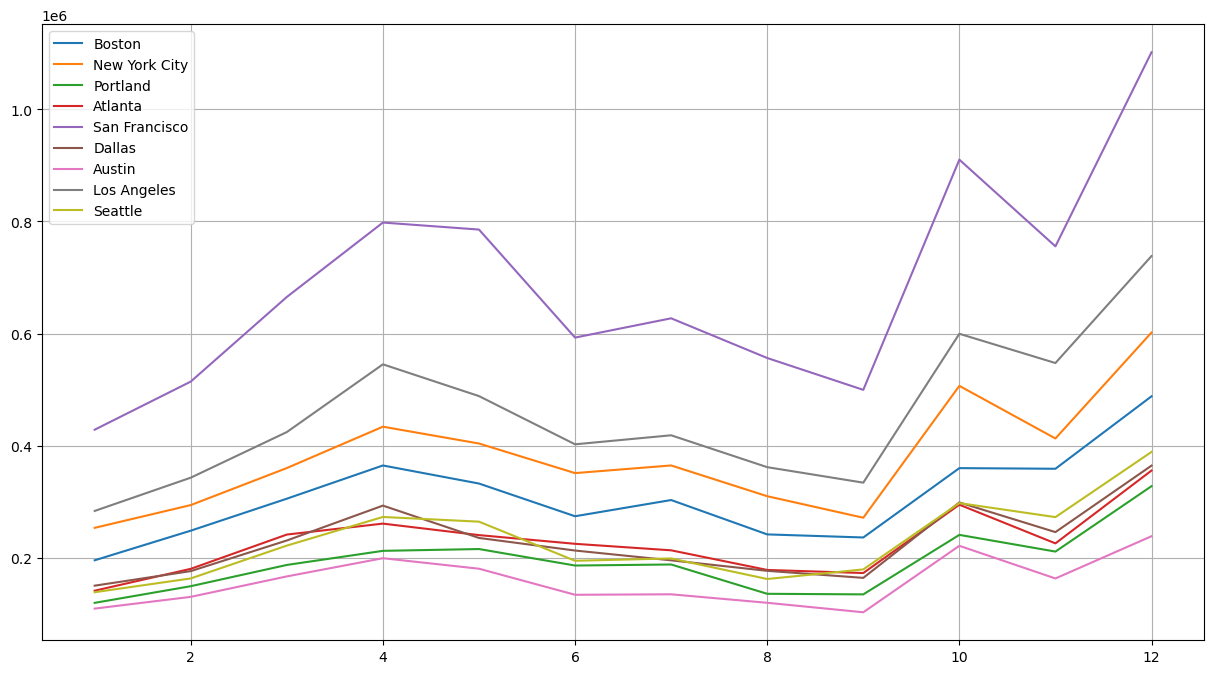

In [24]:
fig, ax=plt.subplots(figsize=(15, 8))

for city in cities: 
  current_sales = groupby_data.loc[:, city]

  ax.plot(current_sales, label=city)

plt.grid()
plt.legend()
plt.show()

Products with the highest Sales

Figure 2.4

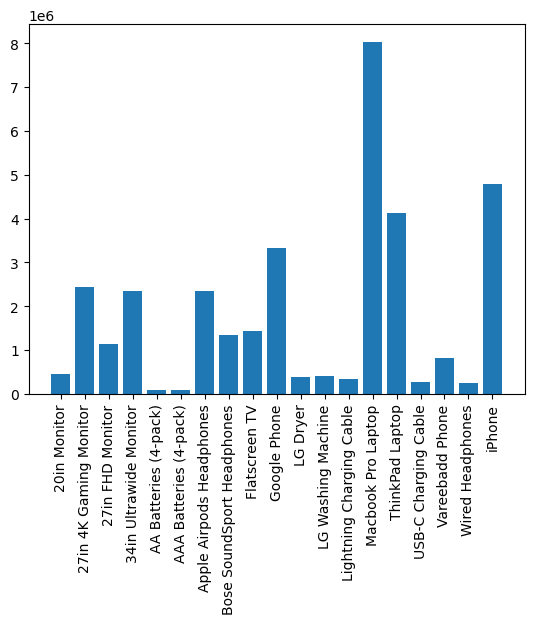

In [25]:
groupby_data = data.groupby('Product').sum()['Sales']
plt.bar(groupby_data.index, groupby_data)

plt.xticks(rotation=90)
plt.show()

In [26]:
quantity = data.groupby('Product').sum()['Quantity Ordered']
unit_price = data.groupby('Product').mean()['Price Each']

print(quantity)
print(unit_price)

Product
20in Monitor                   4114
27in 4K Gaming Monitor         6237
27in FHD Monitor               7534
34in Ultrawide Monitor         6189
AA Batteries (4-pack)         24929
AAA Batteries (4-pack)        27623
Apple Airpods Headphones      15598
Bose SoundSport Headphones    13395
Flatscreen TV                  4811
Google Phone                   5529
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      22497
Macbook Pro Laptop             4724
ThinkPad Laptop                4129
USB-C Charging Cable          23046
Vareebadd Phone                2067
Wired Headphones              19823
iPhone                         6847
Name: Quantity Ordered, dtype: int64
Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.

Figure 2.5

/var/folders/28/fgqjnsv92y79zmp7qybcf9gh0000gn/T/ipykernel_5891/2221882488.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(quantity.index, rotation=90)


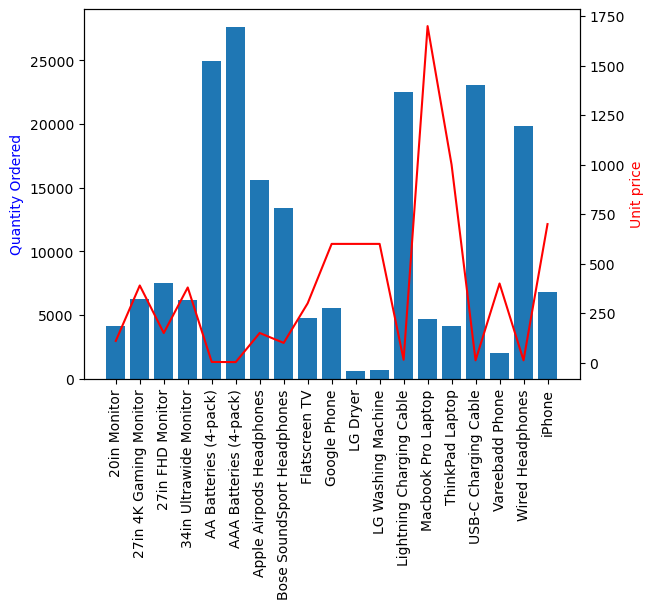

In [27]:
quantity = data.groupby('Product').sum()['Quantity Ordered']
unit_price = data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#plot quantity in the first axes
ax1.bar(quantity.index, quantity)
ax1.set_ylabel('Quantity Ordered', color='blue')

#plot unit price in the second axes
ax2.plot(unit_price, color='red')
ax2.set_ylabel('Unit price', color='red')

ax1.set_xticklabels(quantity.index, rotation=90)
plt.show()

In [28]:
data['Hour'] = data['Order Date'].dt.hour
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,248151,AA Batteries (4-pack),4,3.84,2018-09-17 14:44:00,"883 West St, Boston, MA 02215",9,15.36,Boston,14
1,248152,USB-C Charging Cable,2,11.95,2018-09-29 10:19:00,"71 Ridge St, New York City, NY 10001",9,23.90,New York City,10
2,248153,USB-C Charging Cable,1,11.95,2018-09-16 17:48:00,"372 Spruce St, Portland, OR 97035",9,11.95,Portland,17
3,248154,27in FHD Monitor,1,149.99,2018-09-27 07:52:00,"315 Meadow St, Atlanta, GA 30301",9,149.99,Atlanta,7
4,248155,USB-C Charging Cable,1,11.95,2018-09-01 19:03:00,"408 Lake St, San Francisco, CA 94016",9,11.95,San Francisco,19


Figure 2.6

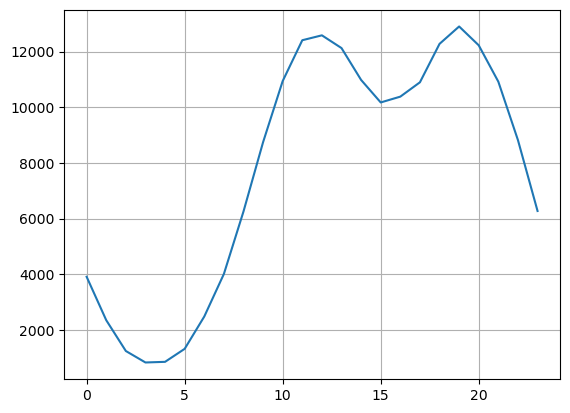

In [29]:
groupby_data = data.groupby('Hour').count()['Order ID']

plt.plot(groupby_data)
plt.grid()
plt.show()